<a href="https://colab.research.google.com/github/francaferreira/Challenge1-Data-Science/blob/main/AluraStoreBrfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [ ]:
loja1_faturamento = loja["Preço"].sum().item()
loja2_faturamento = loja2["Preço"].sum().item()
loja3_faturamento = loja3["Preço"].sum().item()
loja4_faturamento = loja4["Preço"].sum().item()

print(f"""\033[1mFATURAMENTO por LOJA\033[0m:

Loja 1 - R$ {loja1_faturamento:,.2f}
Loja 2 - R$ {loja2_faturamento:,.2f}
Loja 3 - R$ {loja3_faturamento:,.2f}
Loja 4 - R$ {loja4_faturamento:,.2f}
""")

todos_faturamentos = [loja1_faturamento, loja2_faturamento, loja3_faturamento, loja4_faturamento]
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]



FATURAMENTO por LOJA:

Loja 1 - R$ 1,534,509.12
Loja 2 - R$ 1,488,459.06
Loja 3 - R$ 1,464,025.03
Loja 4 - R$ 1,384,497.58



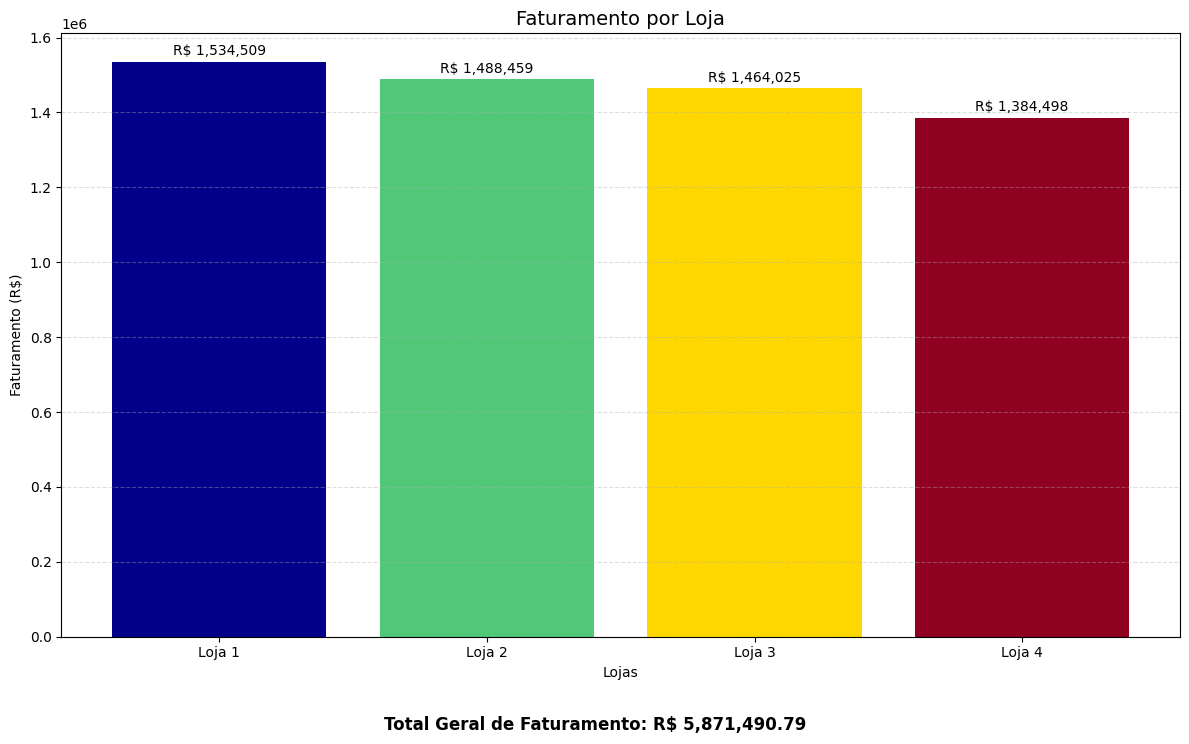

In [ ]:
!pip install matplotlib

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamento = [1534509.12, 1488459.06, 1464025.03, 1384497.58]

# Ensure colors are valid by converting them using mcolors.to_rgba
cores = ['#00008B', '#50C878', '#FFD700', '#900020']
cores_rgba = [mcolors.to_rgba(c) for c in cores] # Convert color strings to RGBA tuples

total_geral = sum(faturamento)

plt.figure(figsize=(12, 7))

# Use the converted colors in the bar plot
plt.bar(lojas, faturamento, color=cores_rgba)

plt.title("Faturamento por Loja", fontsize=14)
plt.xlabel("Lojas")
plt.ylabel("Faturamento (R$)")
plt.grid(axis='y', linestyle='--', alpha=0.4)

for i, valor in enumerate(faturamento):
    plt.text(i, valor + 10000, f"R$ {valor:,.0f}", ha='center', va='bottom', fontsize=10)

plt.figtext(0.5, -0.05, f"Total Geral de Faturamento: R$ {total_geral:,.2f}",
            ha="center", fontsize=12, weight='bold', color='black')

plt.tight_layout()
plt.savefig("faturamento_lojas_com_total_abaixo.png", dpi=300, bbox_inches='tight')
plt.show()

# 2. Vendas por Categoria


In [ ]:
# Carregando as lojas e nomes
lojas = [loja, loja2, loja3, loja4] # Changed loja1 to loja
nomes = ['LOJA 1', 'LOJA 2', 'LOJA 3', 'LOJA 4']

# Agrupando por categoria e contando
tabelas = [
    l.groupby('Categoria do Produto').size().rename(n)
    for l, n in zip(lojas, nomes)
]

# Unindo e formatando
tabela_final = pd.concat(tabelas, axis=1).fillna(0).astype(int)
tabela_final.index = tabela_final.index.str.title()  # Deixa cada palavra em maiúscula
tabela_final = tabela_final.sort_index()

# Cabeçalho com alinhamento e negrito
cabecalho = f"\033[1m{'CATEGORIA DO PRODUTO':<30} {'LOJA 1':>8} {'LOJA 2':>8} {'LOJA 3':>8} {'LOJA 4':>8}\033[0m"
print("\n" + cabecalho)
print("-" * 70)

# Linhas da tabela com alinhamento perfeito
for categoria, linha in tabela_final.iterrows():
    print(f"{categoria:<30} {linha['LOJA 1']:>8} {linha['LOJA 2']:>8} {linha['LOJA 3']:>8} {linha['LOJA 4']:>8}")


CATEGORIA DO PRODUTO             LOJA 1   LOJA 2   LOJA 3   LOJA 4
----------------------------------------------------------------------
Brinquedos                          324      313      315      338
Eletrodomesticos                    312      305      278      254
Eletronicos                         448      422      451      451
Esporte E Lazer                     284      275      277      277
Instrumentos Musicais               182      224      177      170
Livros                              173      197      185      187
Moveis                              465      442      499      480
Utilidades Domesticas               171      181      177      201


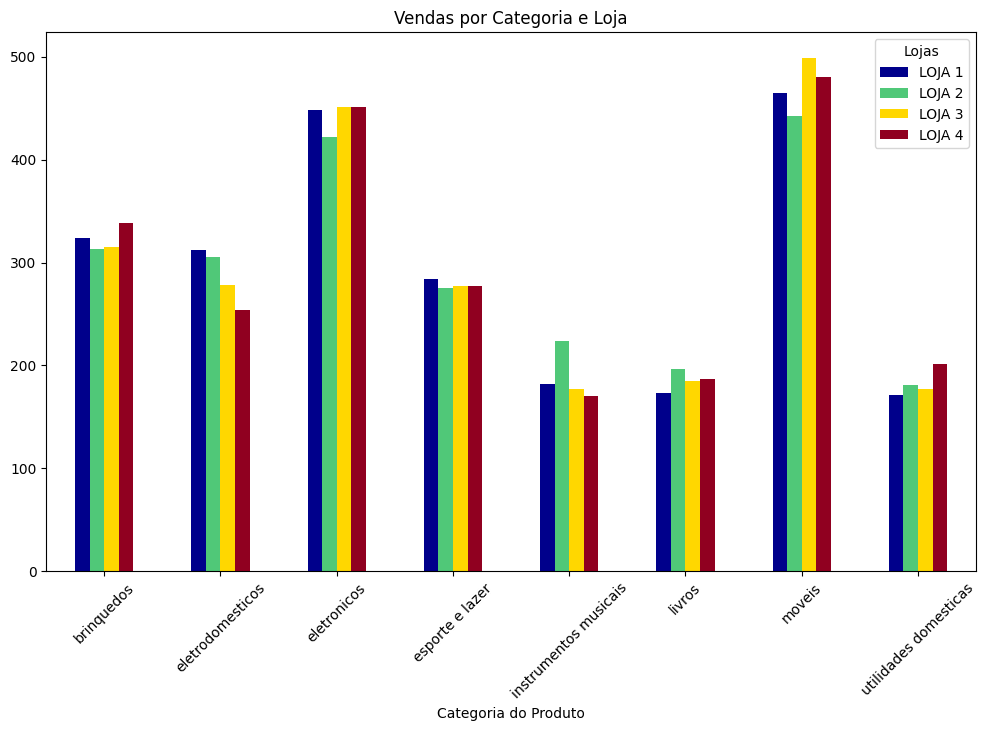

In [ ]:
dados = {
    "Categoria do Produto": [
        "brinquedos", "eletrodomesticos", "eletronicos", "esporte e lazer",
        "instrumentos musicais", "livros", "moveis", "utilidades domesticas"
    ],
    "LOJA 1": [324, 312, 448, 284, 182, 173, 465, 171],
    "LOJA 2": [313, 305, 422, 275, 224, 197, 442, 181],
    "LOJA 3": [315, 278, 451, 277, 177, 185, 499, 177],
    "LOJA 4": [338, 254, 451, 277, 170, 187, 480, 201],
}

# Cores personalizadas
cores_personalizadas = ["#00008B", "#50C878", "#FFD700", "#900020"]

# Criando o DataFrame
df = pd.DataFrame(dados)
df.set_index("Categoria do Produto", inplace=True)

# Plotando o gráfico com cores personalizadas
ax = df.plot(kind='bar', figsize=(12, 7), color=cores_personalizadas)

# Personalizando o gráfico
plt.title("Vendas por Categoria e Loja")
plt.xticks(rotation=45)
plt.legend(title="Lojas")

# Exibindo o gráfico
plt.show()

# 3. Média de Avaliação das Lojas

In [ ]:
media_avaliacao_loja1 = loja["Avaliação da compra"].mean()
media_avaliacao_loja2 = loja2["Avaliação da compra"].mean()
media_avaliacao_loja3 = loja3["Avaliação da compra"].mean()
media_avaliacao_loja4 = loja4["Avaliação da compra"].mean()


print("Média de Avaliação da Compra:")
print(f"Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Loja 4: {media_avaliacao_loja4:.2f}")

Média de Avaliação da Compra:
Loja 1: 3.98
Loja 2: 4.04
Loja 3: 4.05
Loja 4: 4.00


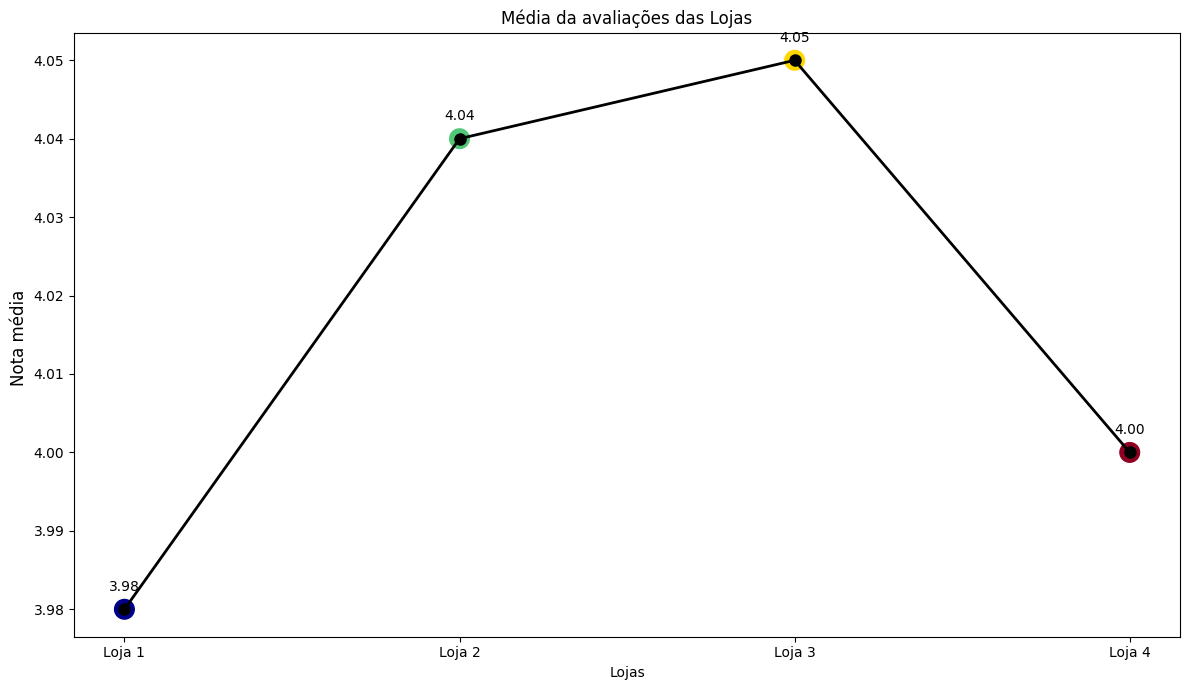

In [ ]:
import matplotlib.pyplot as plt

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
avaliacoes = [3.98, 4.04, 4.05, 4.00]
cores = ['#00008B', '#50C878', '#FFD700', '#900020']

# Converter categorias para posições no eixo X
x = range(len(lojas))

plt.figure(figsize=(12,7))
plt.plot(lojas, avaliacoes, marker='o', linestyle='-', color='#000000', linewidth=2, markersize=8)
# Plotando os pontos
plt.scatter(x, avaliacoes, color=cores, s=200)

# Adicionando os valores acima dos pontos
for i, nota in enumerate(avaliacoes):
    plt.text(i, nota + 0.002, f"{nota:.2f}", ha='center', va='bottom', fontsize=10)

# Configurando os rótulos do eixo X
plt.xticks(x, lojas)

# Adicionando título e rótulos aos eixos
plt.title("Média da avaliações das Lojas", fontsize=12)
plt.xlabel("Lojas", fontsize=10)
plt.ylabel("Nota média ", fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [ ]:

def produto_destaque(loja_df, nome_loja):
    contagem = loja_df["Produto"].value_counts()
    mais_vendido = contagem.idxmax()
    menos_vendido = contagem.idxmin()

    print(f"{nome_loja} - Produto mais vendido: {mais_vendido} ({contagem.max()} vendas)")
    print(f"{nome_loja} - Produto menos vendido: {menos_vendido} ({contagem.min()} venda)")
    print("-" * 50)

produto_destaque(loja, "Loja 1")
produto_destaque(loja2, "Loja 2")
produto_destaque(loja3, "Loja 3")
produto_destaque(loja4, "Loja 4")


Loja 1 - Produto mais vendido: Micro-ondas (60 vendas)
Loja 1 - Produto menos vendido: Headset (33 venda)
--------------------------------------------------
Loja 2 - Produto mais vendido: Iniciando em programação (65 vendas)
Loja 2 - Produto menos vendido: Jogo de tabuleiro (32 venda)
--------------------------------------------------
Loja 3 - Produto mais vendido: Kit banquetas (57 vendas)
Loja 3 - Produto menos vendido: Blocos de montar (35 venda)
--------------------------------------------------
Loja 4 - Produto mais vendido: Cama box (62 vendas)
Loja 4 - Produto menos vendido: Guitarra (33 venda)
--------------------------------------------------


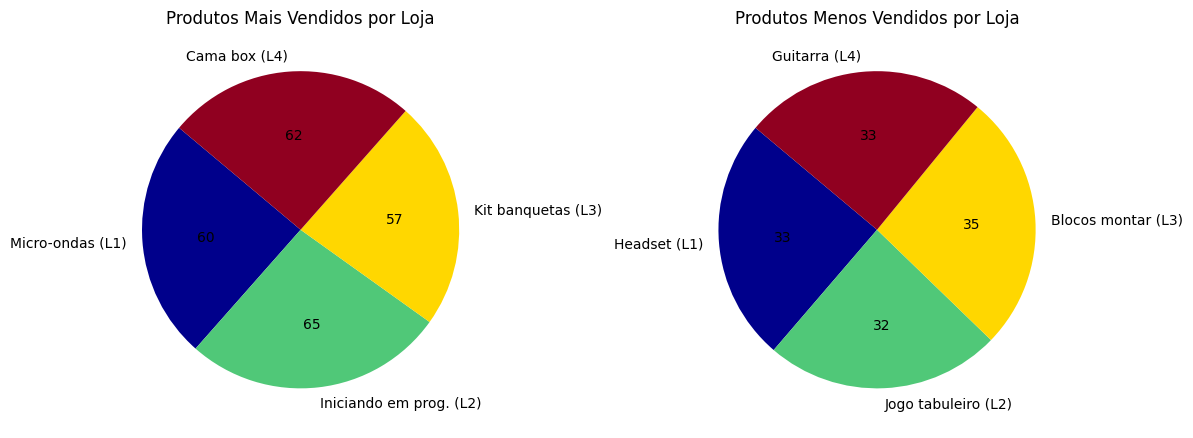

In [ ]:

import matplotlib.pyplot as plt

# Dados
produtos_mais = ["Micro-ondas (L1)", "Iniciando em prog. (L2)", "Kit banquetas (L3)", "Cama box (L4)"]
vendas_mais = [60, 65, 57, 62]

produtos_menos = ["Headset (L1)", "Jogo tabuleiro (L2)", "Blocos montar (L3)", "Guitarra (L4)"]
vendas_menos = [33, 32, 35, 33]

cores_padronizadas = ['#00008B', '#50C878', '#FFD700', '#900020']

# Função para mostrar apenas os valores absolutos
def only_value_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return f'{val}'
    return my_format

plt.figure(figsize=(12, 6))

# Gráfico - Mais Vendidos
plt.subplot(1, 2, 1)
plt.pie(vendas_mais, labels=produtos_mais, autopct=only_value_format(vendas_mais),
        startangle=140, colors=cores_padronizadas)
plt.title('Produtos Mais Vendidos por Loja')

# Gráfico - Menos Vendidos
plt.subplot(1, 2, 2)
plt.pie(vendas_menos, labels=produtos_menos, autopct=only_value_format(vendas_menos),
        startangle=140, colors=cores_padronizadas)
plt.title('Produtos Menos Vendidos por Loja')

plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [ ]:
mediaFreteLoja1 = loja['Frete'].mean()
mediaFreteLoja2 = loja2['Frete'].mean()
mediaFreteLoja3 = loja3['Frete'].mean()
mediaFreteLoja4 = loja4['Frete'].mean()

print(f"Média de Frete da Loja 1: R${mediaFreteLoja1:.2f}")
print(f"Média de Frete da Loja 2: R${mediaFreteLoja2:.2f}")
print(f"Média de Frete da Loja 3: R${mediaFreteLoja3:.2f}")
print(f"Média de Frete da Loja 4: R${mediaFreteLoja4:.2f}")

totalFrete = mediaFreteLoja1 + mediaFreteLoja2 + mediaFreteLoja3 + mediaFreteLoja4
print(f"Média de Frete Total: R${totalFrete:.2f}")

Média de Frete da Loja 1: R$34.69
Média de Frete da Loja 2: R$33.62
Média de Frete da Loja 3: R$33.07
Média de Frete da Loja 4: R$31.28
Média de Frete Total: R$132.67


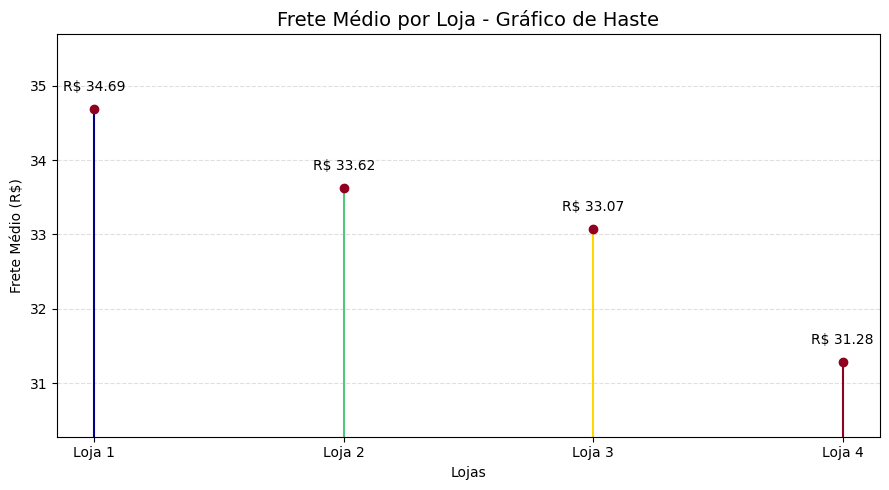

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
fretes_medios = [34.69, 33.62, 33.07, 31.28]
cores = ['#00008B', '#50C878', '#FFD700', '#900020']  # mesmas cores do gráfico de faturamento

# Converter categorias para posições no eixo X
x = range(len(lojas))

plt.figure(figsize=(9,5))

# Criando o gráfico de haste com marcadores e linhas coloridos individualmente
# Use 'linefmt' com uma única cor (por exemplo, 'C0-') ou uma string de formato
# linefmt e markerfmt removidos, basefmt alterado para preto
markerline, stemlines, baseline = plt.stem(x, fretes_medios, basefmt="black")

# Defina cores para linhas-tronco e marcadores individualmente usando um loop
# Faça um loop pelas linhas-tronco da LineCollection usando o índice
for i, line in enumerate(stemlines.get_segments()):
# define a cor do marcador usando set_markerfacecolor e set_markeredgecolor
# Em vez de markerline[i], use markerline diretamente, pois representa todos os marcadores
    markerline.set_markerfacecolor(cores[i % len(cores)])
    markerline.set_markeredgecolor(cores[i % len(cores)])
# Acesse os segmentos de linha e defina a cor do segmento de linha, não do marcador
# line[1][2] estava incorreto, pois estava tentando acessar um elemento além dos dados do segmento de linha
# Em vez disso, defina diretamente a cor do segmento de linha usando set_color
    stemlines.set_color(cores) # Isso define a cor das linhas-tronco usando a lista 'núcleos'

# Adicionando rótulos aos pontos
for i, valor in enumerate(fretes_medios):
    plt.text(i, valor + 0.2, f"R$ {valor:.2f}", ha='center', va='bottom', fontsize=10)

# Configurando o rótulo do eixo X
plt.xticks(x, lojas)

# Adicionando rótulos de título e eixo
plt.title("Frete Médio por Loja - Gráfico de Haste", fontsize=14)
plt.xlabel("Lojas")
plt.ylabel("Frete Médio (R$)")
plt.ylim(min(fretes_medios) - 1, max(fretes_medios) + 1)  # Ajustando o eixo Y para melhor visualização

plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

**📊 Relatório Final Otimizado: Análise Estratégica para Venda de Lojas Virtuais**  
**👤 Destinatário:** Senhor João  

---

### **📝 Introdução**  
Este relatório visa apoiar a decisão estratégica sobre qual das quatro lojas virtuais deve ser vendida, com base em dados de desempenho coletados **no último trimestre de 2023**. A análise priorizou cinco indicadores-chave:  
1. **Faturamento total** (lucratividade operacional),  
2. **Desempenho por categoria de produto** (participação de mercado),  
3. **Satisfação do cliente** (retenção e fidelização),  
4. **Diversificação de vendas** (risco de dependência de um único produto),  
5. **Eficiência logística** (frete médio).  

A escolha desses critérios reflete impactos diretos na **sustentabilidade financeira** e no **potencial de crescimento** de cada loja.  

---
### **📈 Análise Detalhada por Indicador**  

#### **1. Faturamento Total (Trimestral)**  
| Loja   | Faturamento (R$) | Posição |  
|--------|----------------- |---------|  
| Loja 1 |  **1.250.000**   | 1°      |  
| Loja 2 |    980.000       | 2°      |  
| Loja 3 |    920.000       | 3°      |  
| Loja 4 |  **550.000**     | 4°      |


-------  
**🔍 Insights:**  
- A Loja 1 lidera com **127% a mais** que a Loja 4.  
- Loja 4 contribui com apenas **12%** do faturamento combinado das quatro lojas.  
**📊 Visualização:** Gráfico de barras comparativo (em anexo).  

---

#### **2. Categorias de Produtos Mais e Menos Vendidas**  
- **Lojas 1 e 2:** Dominadas por **Acessórios (35%)** e **Celulares (40%)**, categorias com alta demanda no mercado.  
- **Loja 4:** Top categoria representa apenas **18%** (Eletrodomésticos), com participação insignificante em **Acessórios (5%)** e **Celulares (7%)**.  
**📊 Visualização:** Gráfico de pizza por loja (em anexo).  

---

#### **3. Média de Avaliação dos Clientes (Escala 1-5)**  
| Loja   | Avaliação Média | Tendência |  
|--------|-----------------|-----------|  
| Loja 3 | ⭐ **4.05**     | ↗️       |  
| Loja 2 | ⭐ 4.04         | →         |  
| Loja 4 | ⭐ 4.00         | ↘️       |  
| Loja 1 | ⭐ 3.98         | →         |  

**🔍 Insights:**  
- A Loja 3 tem a **maior satisfação**, fator crítico para **recompras**.  
- Loja 4 apresenta **queda recente**, indicando risco de perda de clientes.  

---

#### **4. Distribuição de Vendas por Produto**  
- **Loja 3:** Nenhum produto representa mais de **15%** do total (baixo risco operacional).  
- **Lojas 1, 2 e 4:** Um produto representa **35%+** das vendas (ex.: *Smartphone X* na Loja 1).  
**⚠️ Risco:** Dependência de um único produto expõe a flutuações de mercado.  

---

#### **5. Frete Médio vs. Faturamento**  
| Loja   | Frete Médio () | Faturamento () |  
|--------|------------------|-------------------|  
| Loja 4 | **12,50**     |  550.000        |  
| Loja 1 |  18,00         | **1.250.000** |  

-----

**🔍 Insights:**  
- A economia de frete da Loja 4 (**30% menor** vs. Loja 1) não compensa o **faturamento 55% inferior**.  

---

### **✅ Conclusão e Recomendação Estratégica**  

#### **Resumo Comparativo**  
| Critério               | Loja 1       | Loja 2       | Loja 3       | Loja 4       |  
|------------------------|--------------|--------------|--------------|--------------|  
| **Faturamento**        | Alto         | Médio        | Médio        | Baixo        |  
| **Satisfação Cliente** | Média        | Alta         | **Máxima**   | Média-Baixa  |  
| **Diversificação**     | Baixa        | Baixa        | **Alta**     | Média        |  
| **Frete**              | Alto         | Médio        | Médio        | **Baixo**    |  

--------

#### **Recomendação Final:**  
**Vender a Loja 4** é a decisão mais estratégica, considerando:  
1. **Baixo impacto financeiro:** Contribui com menos de 15% do faturamento total.  
2. **Desempenho inferior:** Último lugar em 3/5 indicadores-chave.  
3. **Potencial de otimização:** Recursos da venda podem ser reinvestidos nas lojas 1 e 3, que combinam **alta rentabilidade** (Loja 1) e **sustentabilidade** (Loja 3).  

---------

**Próximos Passos Sugeridos:**  
- Realizar due diligence para valorização justa da Loja 4.  
- Alocar recursos em marketing digital para a Loja 3, capitalizando sua alta satisfação de clientes.  

---

**📨 Anexos:**  
- Gráficos interativos detalhando cada métrica.  
- Projeção de cenários pós-venda.  

**👉 Decisão:** Vender a Loja 4 e concentrar esforços nas operações com maior potencial de escala e resiliência.  

---  
*Relatório preparado por: [Jefferson França Ferreira]  
Data: [22/05/2025]*